In [19]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
import seaborn as sns


%store -r hou_listings_df
%store -r hou_gdp_df
%store -r hou_electricity_df
%store -r hou_per_capita_df
%store -r hou_house_price_df
%store -r returns



In [21]:
#read in commodity data
gas_prices_df = pd.read_csv('commodity_files/gas_prices.csv', index_col = 'DATE')
gas_prices_df.columns = ['Gas Prices']
lumber_prices_df = pd.read_csv('commodity_files/lumber_prices.csv', index_col = 'DATE')
lumber_prices_df.columns = ['Lumber Prices']
natural_gas_prices_df = pd.read_csv('commodity_files/natural_gas_prices.csv', index_col = 'DATE')
natural_gas_prices_df.columns = ['Natural Gas Prices']

In [4]:
housing_and_commodities_df = pd.concat([hou_house_price_df,
                                        gas_prices_df,
                                        lumber_prices_df,
                                        natural_gas_prices_df],
                                       axis = 'columns',
                                       join = 'inner')

housing_and_commodities_df.head()

,House_Pricing,Gas Prices,Lumber Prices,Natural Gas Prices
DATE,,,,
2013-01-01,191.07,275.1,190.9,143.1
2013-04-01,194.95,297.2,208.4,163.9
2013-07-01,199.63,298.4,190.5,155.6
2013-10-01,204.33,285.0,200.4,149.5
2014-01-01,208.26,271.1,210.5,180.7


,House_Pricing,Gas Prices,Lumber Prices,Natural Gas Prices
House_Pricing,1.000000,-0.004642,0.794898,0.145615
Gas Prices,-0.004642,1.000000,0.244577,0.818349
Lumber Prices,0.794898,0.244577,1.000000,0.314771
Natural Gas Prices,0.145615,0.818349,0.314771,1.000000


<AxesSubplot:>

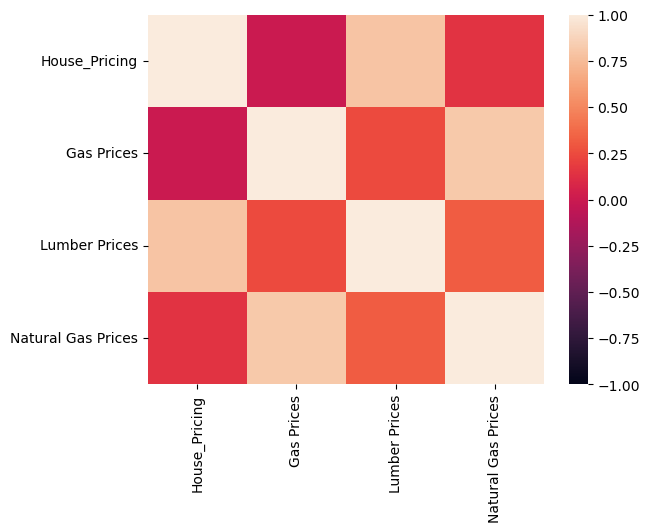

In [5]:
#determining correlation between commodity prices and Houston housing prices
housing_and_commodities_df_corr = housing_and_commodities_df.corr()
display(housing_and_commodities_df_corr)
sns.heatmap(housing_and_commodities_df_corr, vmin = -1, vmax = 1)

Lumber has a strong correlation to housing prices in the Houston area. 
to be continued...

In [145]:
us_inflation_df = pd.read_csv('commodity_files/inflation.csv')
us_inflation_df.columns = ['DATE','Inflation Rate']
us_inflation_df
# us_inflation_df['Inflation Rate'] = us_inflation_df['Inflation Rate'].str.replace('.', '')
# us_inflation_pct_change = us_inflation_df.pct_change().dropna()
# us_inflation_df['Inflation Rate'] = us_inflation

,DATE,Inflation Rate
0,2013-01-02,2.48
1,2013-01-03,2.46
2,2013-01-04,2.48
3,2013-01-07,2.52
4,2013-01-08,2.49
...,...,...
2638,2023-02-13,2.31
2639,2023-02-14,2.31
2640,2023-02-15,2.35
2641,2023-02-16,2.37


In [146]:
us_interest_rate_df = pd.read_csv('commodity_files/FEDFUNDS.csv')
us_interest_rate_df.columns = ['DATE', 'Interest Rate']
us_interest_rate_df



,DATE,Interest Rate
0,2013-01-01,0.14
1,2013-02-01,0.15
2,2013-03-01,0.14
3,2013-04-01,0.15
4,2013-05-01,0.11
...,...,...
116,2022-09-01,2.56
117,2022-10-01,3.08
118,2022-11-01,3.78
119,2022-12-01,4.10


In [144]:
cpi_df = pd.read_csv('commodity_files/cpi.csv')
cpi_df.columns = ['DATE','CPI']
cpi_df= cpi_df.loc[cpi_df['CPI'] != '.']
cpi_df['CPI'] = cpi_df['CPI'].astype(float)
cpi_df['CPI'] = cpi_df['CPI'].pct_change().dropna()
cpi_df

,DATE,CPI
0,2013-02-01,NaN
2,2013-04-01,0.008701
4,2013-06-01,0.001812
6,2013-08-01,0.003334
8,2013-10-01,-0.003773
10,2013-12-01,0.009750
12,2014-02-01,0.009203
14,2014-04-01,0.007386
16,2014-06-01,0.006371
18,2014-08-01,-0.002637


In [147]:
econ_data = pd.merge(
    returns,
    cpi_returns,
    us_inflation_df,
    us_interest_rate_df,
    on = 'DATE'
)

econ_data_combined

TypeError: merge() got multiple values for argument 'on'

In [74]:
econ_data_corr = econ_data.corr()
display(econ_data_corr)

,CPI,Interest Rate
CPI,1.00000,-0.18916
Interest Rate,-0.18916,1.00000


In [7]:
#Read in zip code and coordinates data 
#remove unneeded columns
#split coordinates into longitude and latitude

houston_zips_and_coordinates = 'http://zipatlas.com/us/tx/houston/zip-code-comparison/unemployment-rate.htm'
houston_zips_and_coordinates = pd.read_html(houston_zips_and_coordinates)
houston_zips_and_coordinates = houston_zips_and_coordinates[11]
houston_zips_and_coordinates.columns = ['0', 'Zip Code', 'Coordinates', 'City', 'Population', 'Unemployment Rate', 'National Rank']
houston_zips_and_coordinates.drop(columns = ['0','City', 'National Rank'], inplace = True)
houston_zips_and_coordinates = houston_zips_and_coordinates.drop(houston_zips_and_coordinates.index[0])
split = houston_zips_and_coordinates['Coordinates'].str.split(",", n=1, expand = True)
houston_zips_and_coordinates['Longitude'] = split[0]
houston_zips_and_coordinates['Latitude'] = split[1]
houston_zips_and_coordinates.drop(columns = ['Coordinates','Unemployment Rate', 'Population'], inplace = True)
houston_zips_and_coordinates

,Zip Code,Longitude,Latitude
1,77004,29.724893,-95.363752
2,77002,29.756845,-95.365652
3,77051,29.663567,-95.375573
4,77003,29.749563,-95.346265
5,77028,29.825122,-95.286360
...,...,...,...
92,77030,29.704849,-95.404429
93,77094,29.769285,-95.681292
94,77027,29.744002,-95.443213
95,77098,29.734813,-95.416098


In [8]:
#read in neighborhood specific real estate data
#drop unneeded columns
#rename column that will be used for merge

houston_housing_data_2020_df = pd.read_csv('houston_housing_data_2020.csv')
houston_housing_data_2020_df.drop(columns = ['Owner vs. Renter Ratio (ZIP)', 'Average Days on Market (2020)'], inplace = True)
houston_housing_data_2020_df = houston_housing_data_2020_df.rename(columns={'ZIP':'Zip Code'})
houston_housing_data_2020_df



,Neighborhood,Zip Code,2020 Median Home Price,5-Year Percent Growth (2015-2020),1-Year Percent Growth (2019-2020),Average Square Feet,Persons Per Houehold (ZIP),Income Per Household (ZIP)
0,1960/Cypress,77065,"$225,000",36.40%,11.60%,"2,279",2.58,"$75,972"
1,Aldine Area,77073,"$174,990",41.10%,9.40%,"1,859",3.53,"$63,540"
2,Alief,77072,"$190,000",32.90%,8.60%,"2,030",3.35,"$49,188"
3,Alvin North,77583,"$287,879",33.90%,3.90%,"2,482",3.37,"$101,590"
4,Alvin South,77511,"$224,686",45.60%,12.40%,"1,997",2.88,"$70,567"
...,...,...,...,...,...,...,...,...
142,West University/Southside Area,77005,"$1,360,000",11.20%,7.90%,"3,768",2.46,"$221,568"
143,Westchase Area,77082,"$590,000",-16.20%,6.90%,"3,558",2.47,"$72,973"
144,Willis Area,77378,"$183,000",30.70%,10.90%,"1,649",3.06,"$61,231"
145,Willow Meadows Area,77035,"$292,000",-7.40%,-1.40%,"2,015",2.73,"$66,163"


In [37]:
#merge the two dataframes on the zip code column
#transform data types for later analysis

houston_neighborhoods = pd.merge(houston_zips_and_coordinates, houston_housing_data_2020_df, on = 'Zip Code')
houston_neighborhoods['2020 Median Home Price'] = houston_neighborhoods['2020 Median Home Price'].str.replace('$', '')
houston_neighborhoods['2020 Median Home Price'] = houston_neighborhoods['2020 Median Home Price'].str.replace(',', '')
houston_neighborhoods['2020 Median Home Price'] = houston_neighborhoods['2020 Median Home Price'].astype(float)
houston_neighborhoods['Income Per Household (ZIP)'] = houston_neighborhoods['Income Per Household (ZIP)'].str.replace('$', '')
houston_neighborhoods['Income Per Household (ZIP)'] = houston_neighborhoods['Income Per Household (ZIP)'].str.replace(',', '')
houston_neighborhoods['Income Per Household (ZIP)'] = houston_neighborhoods['Income Per Household (ZIP)'].astype(float)
houston_neighborhoods['Average Square Feet'] = houston_neighborhoods['Average Square Feet'].str.replace(',', '')
houston_neighborhoods['Average Square Feet'] = houston_neighborhoods['Average Square Feet'].astype(float)
houston_neighborhoods['1-Year Percent Growth (2019-2020)'] = houston_neighborhoods['1-Year Percent Growth (2019-2020)'].str.replace('%', '')
houston_neighborhoods['1-Year Percent Growth (2019-2020)'] = houston_neighborhoods['1-Year Percent Growth (2019-2020)'].astype(float)
houston_neighborhoods['5-Year Percent Growth (2015-2020)'] = houston_neighborhoods['5-Year Percent Growth (2015-2020)'].str.replace('%', '')
houston_neighborhoods['5-Year Percent Growth (2015-2020)'] = houston_neighborhoods['5-Year Percent Growth (2015-2020)'].astype(float)
houston_neighborhoods['Longitude'] = houston_neighborhoods['Longitude'].astype(float)
houston_neighborhoods['Latitude'] = houston_neighborhoods['Latitude'].astype(float)
houston_neighborhoods

/Users/taylorlittle/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/Users/taylorlittle/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Zip Code,Longitude,Latitude,Neighborhood,2020 Median Home Price,5-Year Percent Growth (2015-2020),1-Year Percent Growth (2019-2020),Average Square Feet,Persons Per Houehold (ZIP),Income Per Household (ZIP)
0,77004,29.724893,-95.363752,Midtown - Houston,430000.0,-2.1,2.4,2245.0,2.01,68426.0
1,77004,29.724893,-95.363752,Riverside,359000.0,12.6,12.2,2560.0,2.01,68426.0
2,77004,29.724893,-95.363752,University Area,235350.0,97.8,25.5,1687.0,2.01,68426.0
3,77003,29.749563,-95.346265,East End Revitalized,298000.0,35.5,0.0,1700.0,2.40,59438.0
4,77033,29.666880,-95.335133,Medical Center South,185000.0,60.9,17.8,1651.0,3.11,40713.0
...,...,...,...,...,...,...,...,...,...,...
57,77030,29.704849,-95.404429,Rice/Museum District,950000.0,27.5,11.8,3248.0,2.05,150138.0
58,77027,29.744002,-95.443213,Greenway Plaza,644000.0,25.0,-26.0,2671.0,1.67,137324.0
59,77027,29.744002,-95.443213,Highland Village/Midlane,982100.0,27.5,-0.8,2952.0,1.67,137324.0
60,77027,29.744002,-95.443213,Royden Oaks/Afton Oaks,845000.0,5.6,-11.5,3513.0,1.67,137324.0


In [38]:
#create new column for average price per square foot
average_price_per_square_foot = (houston_neighborhoods['2020 Median Home Price'] / houston_neighborhoods['Average Square Feet'])
average_price_per_square_foot = pd.DataFrame(average_price_per_square_foot)
average_price_per_square_foot = average_price_per_square_foot.astype(float)
average_price_per_square_foot

,0
0,191.536748
1,140.234375
2,139.508002
3,175.294118
4,112.053301
...,...
57,292.487685
58,241.108199
59,332.689702
60,240.535155


In [39]:
#dropping unneccesary columns
houston_neighborhoods.drop(columns = ['2020 Median Home Price', 'Average Square Feet'], inplace = True)
houston_neighborhoods['Average Price Per Square Foot'] = average_price_per_square_foot

In [40]:
#rearranging columns 
houston_neighborhoods = houston_neighborhoods[['Zip Code', 'Neighborhood', 'Longitude', 'Latitude', 'Average Price Per Square Foot', '1-Year Percent Growth (2019-2020)', '5-Year Percent Growth (2015-2020)','Persons Per Houehold (ZIP)', 'Income Per Household (ZIP)']]  
houston_neighborhoods

,Zip Code,Neighborhood,Longitude,Latitude,Average Price Per Square Foot,1-Year Percent Growth (2019-2020),5-Year Percent Growth (2015-2020),Persons Per Houehold (ZIP),Income Per Household (ZIP)
0,77004,Midtown - Houston,29.724893,-95.363752,191.536748,2.4,-2.1,2.01,68426.0
1,77004,Riverside,29.724893,-95.363752,140.234375,12.2,12.6,2.01,68426.0
2,77004,University Area,29.724893,-95.363752,139.508002,25.5,97.8,2.01,68426.0
3,77003,East End Revitalized,29.749563,-95.346265,175.294118,0.0,35.5,2.40,59438.0
4,77033,Medical Center South,29.666880,-95.335133,112.053301,17.8,60.9,3.11,40713.0
...,...,...,...,...,...,...,...,...,...
57,77030,Rice/Museum District,29.704849,-95.404429,292.487685,11.8,27.5,2.05,150138.0
58,77027,Greenway Plaza,29.744002,-95.443213,241.108199,-26.0,25.0,1.67,137324.0
59,77027,Highland Village/Midlane,29.744002,-95.443213,332.689702,-0.8,27.5,1.67,137324.0
60,77027,Royden Oaks/Afton Oaks,29.744002,-95.443213,240.535155,-11.5,5.6,1.67,137324.0


In [13]:
#checking for zip code duplicates
display(houston_neighborhoods['Zip Code'].value_counts())

77007    4
77004    3
77027    3
77018    3
77044    2
77008    2
77042    2
77025    2
77056    2
77063    2
77035    2
77064    2
77024    2
77019    1
77073    1
77041    1
77079    1
77057    1
77065    1
77062    1
77095    1
77005    1
77077    1
77030    1
77006    1
77089    1
77096    1
77003    1
77033    1
77020    1
77009    1
77045    1
77072    1
77088    1
77036    1
77081    1
77092    1
77049    1
77034    1
77080    1
77083    1
77082    1
77054    1
77098    1
Name: Zip Code, dtype: int64

In [1]:
#changing redundant coordinates to distinguish between neighborhoods
houston_neighborhoods.loc[0, ['Longitude', 'Latitude']] = ['29.740800', '-95.375600']
houston_neighborhoods.loc[1, ['Longitude', 'Latitude']] = ['29.708600', '-95.356900']
houston_neighborhoods.loc[10, ['Longitude', 'Latitude']] = ['29.655700', '-95.528000']
houston_neighborhoods.loc[13, ['Longitude', 'Latitude']] = ['29.799100', '-95.289300']
houston_neighborhoods.loc[19, ['Longitude', 'Latitude']] = ['29.739200', '-95.464500']
houston_neighborhoods.loc[22, ['Longitude', 'Latitude']] = ['29.832700', '-95.444800']
houston_neighborhoods.loc[24, ['Longitude', 'Latitude']] = ['29.832600', '-95.424100']
houston_neighborhoods.loc[25, ['Longitude', 'Latitude']] = ['29.778200', '-95.423100']
houston_neighborhoods.loc[26, ['Longitude', 'Latitude']] = ['29.766700', '-95.441000']
houston_neighborhoods.loc[34, ['Longitude', 'Latitude']] = ['29.737500', '-95.514200']
houston_neighborhoods.loc[27, ['Longitude', 'Latitude']] = ['29.767400', '-95.416400']
houston_neighborhoods.loc[37, ['Longitude', 'Latitude']] = ['29.796200', '-95.399100']
houston_neighborhoods.loc[40, ['Longitude', 'Latitude']] = ['29.755900', '-95.537300']
houston_neighborhoods.loc[43, ['Longitude', 'Latitude']] = ['29.689700', '-95.440100']
houston_neighborhoods.loc[52, ['Longitude', 'Latitude']] = ['29.887700', '-95.563000']
houston_neighborhoods.loc[56, ['Longitude', 'Latitude']] = ['29.772600', '-95.575900']
houston_neighborhoods.loc[58, ['Longitude', 'Latitude']] = ['29.732900', '-95.433400']
houston_neighborhoods.loc[59, ['Longitude', 'Latitude']] = ['29.742100', '-95.446600']

NameError: name 'houston_neighborhoods' is not defined

In [45]:
houston_neighborhoods

,Zip Code,Neighborhood,Longitude,Latitude,Average Price Per Square Foot,1-Year Percent Growth (2019-2020),5-Year Percent Growth (2015-2020),Persons Per Houehold (ZIP),Income Per Household (ZIP)
0,77004,Midtown - Houston,29.740800,-95.375600,191.536748,2.4,-2.1,2.01,68426.0
1,77004,Riverside,29.708600,-95.356900,140.234375,12.2,12.6,2.01,68426.0
2,77004,University Area,29.724893,-95.363752,139.508002,25.5,97.8,2.01,68426.0
3,77003,East End Revitalized,29.749563,-95.346265,175.294118,0.0,35.5,2.40,59438.0
4,77033,Medical Center South,29.66688,-95.335133,112.053301,17.8,60.9,3.11,40713.0
...,...,...,...,...,...,...,...,...,...
57,77030,Rice/Museum District,29.704849,-95.404429,292.487685,11.8,27.5,2.05,150138.0
58,77027,Greenway Plaza,29.732900,-95.433400,241.108199,-26.0,25.0,1.67,137324.0
59,77027,Highland Village/Midlane,29.742100,-95.446600,332.689702,-0.8,27.5,1.67,137324.0
60,77027,Royden Oaks/Afton Oaks,29.744002,-95.443213,240.535155,-11.5,5.6,1.67,137324.0


In [43]:
houston_neighborhoods.hvplot.bar(
    x = 'Neighborhood',
    xlabel= 'Neighborhood',
    y= 'Average Price Per Square Foot',
    rot = 45,
    frame_width = 700,
    frame_height = 500
)
#drop down for all data?

:Bars   [Neighborhood]   (Average Price Per Square Foot)

In [44]:
houston_neighborhoods.hvplot.points(
    'Longitude',
    'Latitude',
    geo = True,
    color = 'Neighborhood',
    size = 'Average Price Per Square Foot',
    tiles = 'OSM',
    frame_width = 700,
    frame_height = 500
)
    
    

/Users/taylorlittle/opt/anaconda3/envs/dev/lib/python3.7/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/taylorlittle/opt/anaconda3/envs/dev/lib/python3.7/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/taylorlittle/opt/anaconda3/envs/dev/lib/python3.7/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


TypeError: '<' not supported between instances of 'float' and 'str'

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Neighborhood,Average Price Per Square Foot)